# Author:Kumar Atharva Rustagi

Task 1: Predicting the percentage of a student based on the number of study hour

GRIP @ The Sparks Foundation

A model is created for predicting the percentage of a student depending on his/her study hours
https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csvy/w-data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
df.info()
print("   ")
print("   ")

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
   
   


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:
X = df.drop("Scores", axis = 1)
Y = df["Scores"]

In [12]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

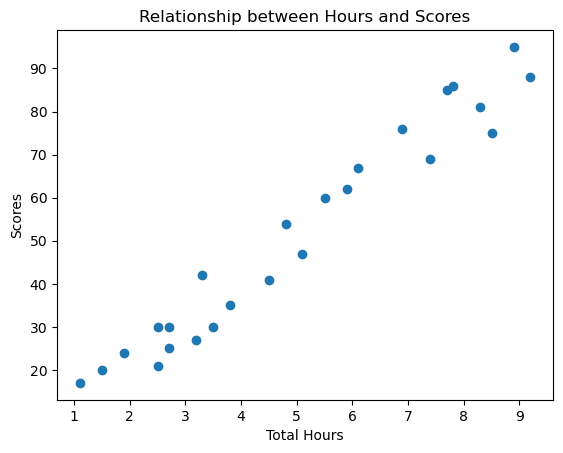

In [17]:
plt.scatter(X,Y)
plt.xlabel("Total Hours")
plt.ylabel("Scores")
plt.title("Relationship between Hours and Scores");

In [23]:
np.random.seed(32)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
np.random.seed(32)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

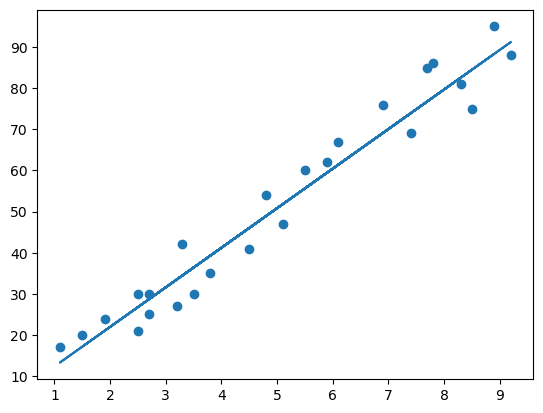

In [21]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);

In [24]:
model.score(X_test, Y_test)

0.9708810118577227

In [25]:
Y_test

14    17
16    30
0     21
18    67
15    95
Name: Scores, dtype: int64

In [26]:
Y_preds = model.predict(X_test)
Y_preds

array([13.31572516, 26.78238812, 26.78238812, 61.41095003, 88.34427595])

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)

pd.DataFrame({"Actual":Y_test, "Predicted":Y_preds})

,Actual,Predicted
14,17,13.315725
16,30,26.782388
0,21,26.782388
18,67,61.410950
15,95,88.344276


In [28]:
hr = pd.DataFrame([9.25])
prediction = model.predict(hr)
prediction

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.71094169])

# The predicted score according to the model is 91.7 score if the student studies for 9.25 hrs

